In [1]:
import numpy as np
from threading import Thread
import os
import psutil  # Optional for CPU usage monitoring
import matplotlib.pyplot as plt  # Optional for plotting
import time
import csv

In [2]:
def multiply_matrix(random_matrices, constant_matrix, result_matrices, start_row, end_row):
    """
    Multiplies a list of random matrices with a constant matrix (row-wise) within a specified row range.

    Args:
        random_matrices (list): List of random matrices to multiply (1k x 1k).
        constant_matrix (np.ndarray): The constant matrix (1k x 1k).
        result_matrices (list): List of result matrices to store the products (1k x 1k).
        start_row (int): Starting row index for multiplication.
        end_row (int): Ending row index (exclusive) for multiplication.
    """
    for i in range(start_row, end_row):
        result_matrices[i] = np.dot(random_matrices[i], constant_matrix)


In [3]:
def generate_random_matrices(n, num_matrices):
    """
    Generates a list of `num_matrices` random matrices of size `n` x `n`.

    Args:
        n (int): Size of each random matrix (1k in your case).
        num_matrices (int): Number of random matrices to generate (100 in your case).

    Returns:
        list: A list containing the generated random matrices.
    """
    random_matrices = []
    for _ in range(num_matrices):
        matrix = np.random.rand(n, n)
        random_matrices.append(matrix)
    return random_matrices

In [4]:
def get_cpu_usage():
    """
    Gets the current CPU usage as a percentage.
    """
    return psutil.cpu_percent(interval=1)

In [5]:
def main():
    n = 2500  # Size of matrices (1k)
    num_matrices = 100
    constant_matrix = np.identity(n)  # Use identity matrix of size n

    # Generate random matrices
    random_matrices = generate_random_matrices(n, num_matrices)

    # Create a result matrix to store the products
    result_matrices = [np.zeros((n, n)) for _ in range(num_matrices)]

    execution_times = []
    num_threads_list = []

    # Get the number of CPU cores
    num_cores = os.cpu_count() or 1
    print(f"Number of CPU cores: {num_cores}")

    for num_threads in range(1, 9):
        start_time = time.time()

        threads = []
        # Divide the workload into equal chunks for each thread
        chunk_size = int(np.ceil(num_matrices / num_threads))
        start_row = 0
        for thread_id in range(num_threads):
            end_row = min(start_row + chunk_size, num_matrices)
            thread = Thread(target=multiply_matrix, args=(
                random_matrices, constant_matrix, result_matrices, start_row, end_row))
            thread.start()
            threads.append(thread)
            start_row = end_row

        # Wait for all threads to finish
        for thread in threads:
            thread.join()

        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)
        num_threads_list.append(num_threads)

        print(f"Execution time with {num_threads} threads: {execution_time:.2f} seconds")

        # Optional: Get and print CPU usage during execution
        cpu_usage = get_cpu_usage()
        print(f"Average CPU Usage during execution with {num_threads} threads: {cpu_usage:.2f}%")

        # Optional: Monitor memory usage during execution
        process = psutil.Process(os.getpid())
        memory_usage = process.memory_info().rss / (1024 ** 2)  # Memory usage in MB
        print(f"Memory usage during execution with {num_threads} threads: {memory_usage:.2f} MB")

    # Plot execution time against the number of threads
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(num_threads_list, execution_times, marker='o')
    plt.xlabel("Number of Threads")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Execution Time vs. Number of Threads")
    plt.grid(True)

    # Print or process the resulting matrices in result_matrices
    # ...

    # Plot average values of result matrices
    plt.subplot(1, 2, 2)
    average_values = [np.mean(matrix) for matrix in result_matrices]
    plt.plot(range(1, num_matrices + 1), average_values)
    plt.xlabel("Matrix Number")
    plt.ylabel("Average Value")
    plt.title("Average Values of Result Matrices")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Write the execution time data to a CSV file
    with open('execution_times.csv', 'w', newline='') as csvfile:
        fieldnames = ['Number of Threads', 'Execution Time (seconds)']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for num_threads, execution_time in zip(num_threads_list, execution_times):
            writer.writerow({'Number of Threads': num_threads, 'Execution Time (seconds)': execution_time})


Number of CPU cores: 16
Execution time with 1 threads: 110.84 seconds
Average CPU Usage during execution with 1 threads: 8.50%
Memory usage during execution with 1 threads: 1267.46 MB
Execution time with 2 threads: 71.04 seconds
Average CPU Usage during execution with 2 threads: 6.20%
Memory usage during execution with 2 threads: 3013.44 MB
Execution time with 3 threads: 74.04 seconds
Average CPU Usage during execution with 3 threads: 5.40%
Memory usage during execution with 3 threads: 2139.85 MB
Execution time with 4 threads: 74.53 seconds
Average CPU Usage during execution with 4 threads: 7.40%
Memory usage during execution with 4 threads: 492.80 MB
Execution time with 5 threads: 79.76 seconds
Average CPU Usage during execution with 5 threads: 6.20%
Memory usage during execution with 5 threads: 217.54 MB
Execution time with 6 threads: 66.59 seconds
Average CPU Usage during execution with 6 threads: 14.10%
Memory usage during execution with 6 threads: 263.18 MB
Execution time with 7 t

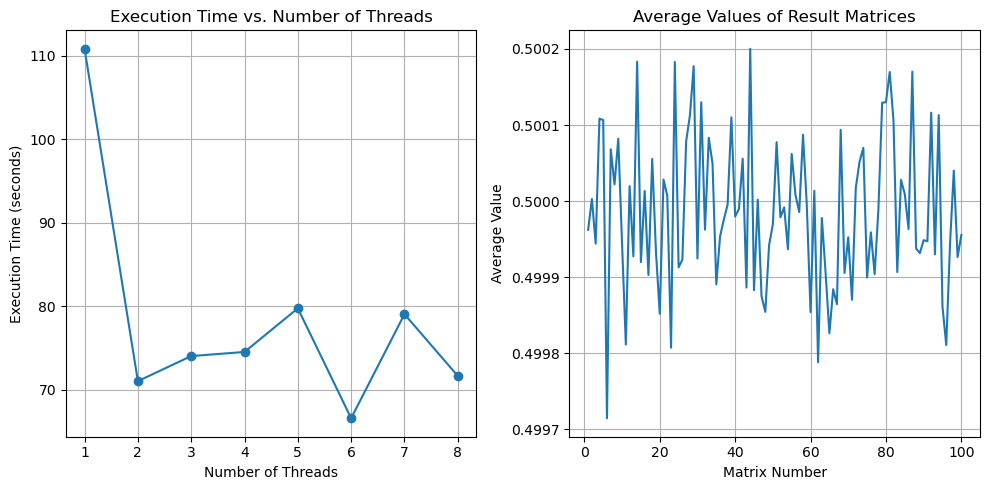

In [6]:
if __name__ == "__main__":
    main()  # Call the main function here
